In [1]:
import pandas as pd

import Experiment_SS as exss
import dfd_ss as dfd

In [2]:
df_mat = pd.read_csv("Data/SecondarySchool/student-mat.csv", delimiter=';')
df_mat['STUDENT ID'] = range(len(df_mat))
print(len(df_mat))
df_mat.head()

395


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,STUDENT ID
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,4


In [3]:
df_por = pd.read_csv("Data/SecondarySchool/student-por.csv", delimiter=';')
df_por['STUDENT ID'] = range(len(df_por))
print(len(df_por))
df_por.head()

649


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,STUDENT ID
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,4


In [4]:
TARGETS = [
    'G1',
    'G2',
    'G3',
    'absences',
    'activities',
    'paid',
    'famsup',
    'schoolsup',
    'studytime'
]

DESCRIPTORS = [ x for x in list(df_mat.columns) if x not in TARGETS ]

ATTR_CONFIG = {
    
}

# Define which columns are numeric #None here bc all are in bins
NUMERIC_COLS = [
    'Medu',
    'Fedu',
    'traveltime',
    'studytime',
    'failures',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
    'absences',
    # 'G1',
    # 'G2',
    'G3'
]

# Define target variable 
Y_COL = "G3"

# Define features used for regression
X_COLS = [
       x for x in TARGETS if x != Y_COL
]

In [5]:
df_mat_cleaned = df_mat.copy()

CAT_TARGETS = ['activities', 'paid', 'famsup', 'schoolsup']
for cat in CAT_TARGETS:
    df_mat_cleaned[cat] = [0 if df_mat.iloc[i][cat] == 'no' else 1 for i in range(len(df_mat)) ]

df_mat_cleaned.head()

df_mat_cleaned.to_csv("Data/SecondarySchool/mathematics_cleaned.csv")

In [6]:
df_por_cleaned = df_por.copy()

CAT_TARGETS = ['activities', 'paid', 'famsup', 'schoolsup']
for cat in CAT_TARGETS:
    df_por_cleaned[cat] = [0 if df_por.iloc[i][cat] == 'no' else 1 for i in range(len(df_por)) ]

df_por_cleaned.head()

df_por_cleaned.to_csv("Data/SecondarySchool/portuguese_cleaned.csv")

In [7]:
df_por_cleaned[['Medu']].value_counts()

Medu
2       186
4       175
1       143
3       139
0         6
Name: count, dtype: int64

In [25]:
exss.main(course='mathematics', test_size=0.2, min_size=25) 
# train size = 650 * 0.8 = 520
# min size = 520 * 10% = 52

Collected 50 subgroup models.
Exported 50 subgroup models to Results/subgroup_mathematics_linear8020.csv
Complex baseline evaluation metrics: {'r2': 0.8887, 'mae': np.float64(1.0472), 'mse': np.float64(2.5272), 'mean_residual': -0.0166, 'y_pred': 241    10.579435
70     14.529548
6      11.688513
160     4.874653
186    11.643672
         ...    
170     3.840655
298    12.763943
42     18.662559
133    11.437009
394     8.423139
Length: 79, dtype: float64}


In [9]:
res_mat = pd.read_csv("Results/subgroup_mathematics_linear.csv")
res_mat.head()

,subgroup,n,cookD,indices,term,coef_group,se_group,t_group,p_group,sig_group,coef_global,se_global,t_global,p_global,sig_global
0,Fjob=='services' ∧ guardian=='father' ∧ intern...,20,355.354179,"[22, 29, 33, 56, 68, 92, 101, 104, 106, 111, 1...",Intercept,-11.642902,3.556311,-3.273870,0.007414,**,-1.826451,0.513934,-3.553864,4.487714e-04,***
1,Fjob=='services' ∧ guardian=='father' ∧ intern...,20,355.354179,"[22, 29, 33, 56, 68, 92, 101, 104, 106, 111, 1...",G1,-0.174043,0.463398,-0.375580,0.714371,,0.178970,0.071761,2.493965,1.323788e-02,*
2,Fjob=='services' ∧ guardian=='father' ∧ intern...,20,355.354179,"[22, 29, 33, 56, 68, 92, 101, 104, 106, 111, 1...",G2,2.171617,0.585761,3.707341,0.003457,**,0.958643,0.062894,15.242151,3.613098e-38,***
3,Fjob=='services' ∧ guardian=='father' ∧ intern...,20,355.354179,"[22, 29, 33, 56, 68, 92, 101, 104, 106, 111, 1...",absences,0.709971,0.238372,2.978412,0.012555,*,0.030804,0.014462,2.130044,3.408245e-02,*
4,Fjob=='services' ∧ guardian=='father' ∧ intern...,20,355.354179,"[22, 29, 33, 56, 68, 92, 101, 104, 106, 111, 1...",activities,-1.591345,1.151864,-1.381539,0.194529,,-0.167914,0.237924,-0.705748,4.809601e-01,


In [10]:
res_mat = pd.read_csv("Results/subgroup_mathematics_linear.csv")
res_mat = res_mat[['subgroup', 'cookD', 'n']].drop_duplicates()

for i in range(10):
    print(f"Sugroup: {res_mat.iloc[i]['subgroup']} with cookD: {res_mat.iloc[i]['cookD']}")

Sugroup: Fjob=='services' ∧ guardian=='father' ∧ internet=='yes' with cookD: 355.3541791371681
Sugroup: Fedu in (-0.001, 2.0] ∧ Fjob=='services' ∧ Medu in (-0.001, 2.0] with cookD: 250.90043408364087
Sugroup: Fjob=='services' ∧ guardian=='father' with cookD: 226.6187843552835
Sugroup: Fjob=='services' ∧ failures in (-0.001, 3.0] ∧ guardian=='father' with cookD: 226.6187843552835
Sugroup: Fjob=='services' ∧ Pstatus=='T' ∧ guardian=='father' with cookD: 226.6187843552835
Sugroup: Fjob=='services' ∧ guardian=='father' ∧ traveltime in (0.999, 2.0] with cookD: 226.6187843552835
Sugroup: Fjob=='services' ∧ guardian=='father' ∧ higher=='yes' with cookD: 226.27192682781703
Sugroup: Dalc in (0.999, 2.0] ∧ Fjob=='services' ∧ guardian=='father' with cookD: 211.98563161794172
Sugroup: Fjob=='services' ∧ Medu in (-0.001, 2.0] ∧ internet=='yes' with cookD: 210.46868991069073
Sugroup: Fjob=='services' ∧ Medu in (-0.001, 2.0] ∧ address=='U' with cookD: 198.85118627962177


In [11]:
res_por = pd.read_csv("Results/subgroup_portuguese_linear.csv")
res_por = res_por[['subgroup', 'cookD', 'n']].drop_duplicates()

for i in range(1):
    print(f"Sugroup: {res_por.iloc[i]['subgroup']} with cookD: {res_por.iloc[i]['cookD']}")

Sugroup: Dalc in (2.0, 5.0] ∧ reason=='course' with cookD: 709.8106221784933


In [21]:
df = pd.read_csv('results/coefs_portuguese8020.csv')

# Create display labels: #1, #2, ...
chosen_por = [30]#[15, 20, 31, 34, 39, 40, 44]# old: [27, 28] #[8, 9, 27, 28, 41, 47]
chosen_mat = [14, 18, 25, 28, 29, 38, 44, 45, 46] #[12, 14, 16, 17, 18, 19, 29, 37]

df_lins = df[df['subgroup'].isin(['#'+str(i) for i in chosen_por] + ['Ω'])]

df_lins = df_lins[df_lins['term'] != 'const']

df_lins

,subgroup,term,coef,p,significant
1,Ω,G1,0.158945,7.676374e-05,yes
2,Ω,G2,0.887581,8.869635e-84,yes
3,Ω,absences,0.017393,1.539378e-01,no
4,Ω,activities,-0.079296,4.716567e-01,no
5,Ω,paid,-0.343987,1.249513e-01,no
6,Ω,famsup,0.122758,2.787126e-01,no
7,Ω,schoolsup,-0.114223,5.399930e-01,no
8,Ω,studytime,0.041240,5.646221e-01,no
280,#30,G1,0.290877,1.610087e-01,no
281,#30,G2,0.723979,7.129836e-04,yes


/var/folders/0_/xw_ks0g978df8kf5jp1rvf2h0000gn/T/ipykernel_14198/1193146966.py:19: UserWarning: The palette list has more values (16) than needed (8), which may not be intended.
  ax = sns.barplot(


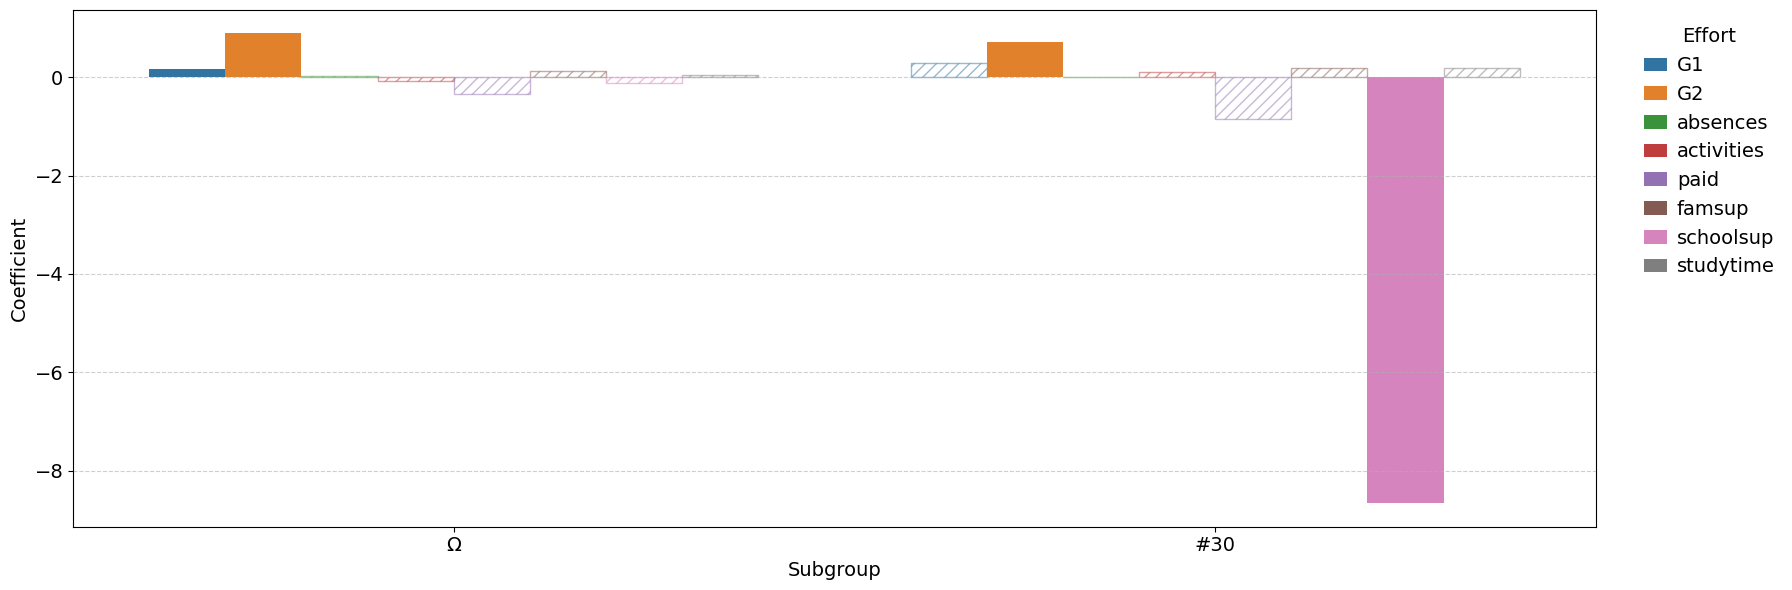

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from matplotlib.patches import Patch


#####
# To DO: Change bar fill depending on significant, yes or no 
#####

palette = sns.color_palette("tab10", 16)
#palette = random.shuffle(palette)
plt.figure(figsize=(18, 6))

df = df_lins#[ df_all['term'] != 'Intercept']

ax = sns.barplot(
    data=df,
    x="subgroup",
    y="coef",
    hue="term",
    dodge=True,
    palette=palette
)
patches_sorted = sorted(ax.patches[:-8], key=lambda p: p.get_x())
for patch, sig in zip(patches_sorted, df_lins['significant']):
    if sig == 'no':
        patch.set_hatch("///")      # striped fill
        patch.set_edgecolor(patch.get_facecolor())  # keep original color for stripes
        patch.set_facecolor("white")  # base color for hatch
        patch.set_alpha(0.5)
#     # sig == 1 → leave as solid color

ax.set_xlabel("Subgroup", fontsize=14)
ax.set_ylabel("Coefficient", fontsize=14)

# Grid (clean style)how 
ax.yaxis.grid(True, linestyle="--", alpha=0.6)
ax.xaxis.grid(False)
ax.yaxis.set_tick_params(labelsize = 14)
ax.xaxis.set_tick_params(labelsize = 14)

# # Legend outside
# # Smaller legend outside the plot
ax.legend(

    title="Effort",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=14,          # legend text size
    title_fontsize=14,    # legend title size
    frameon=False,       # cleaner look
    handlelength=1.2,
    handletextpad=0.5
)
# Custom legend
# Color legend for terms
terms = df_lins["term"].unique()
palette = sns.color_palette("tab10", len(terms))
color_handles = [Patch(facecolor=palette[i], label=term) for i, term in enumerate(terms)]

# # # Hatch legend for significance
sig_handles = [
    Patch(facecolor="white", edgecolor="black", hatch="///", label="not significant"),
    Patch(facecolor="black", edgecolor="black", label="significant")
]

# Combine legends first_legend = ax.legend(handles=color_handles, title="Term", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, title_fontsize=9) ax.add_artist(first_legend) ax.legend(handles=sig_handles, title="Significance", bbox_to_anchor=(1.02, 0.6), loc="upper left", fontsize=8, title_fontsize=9)

plt.tight_layout()
plt.show()

In [14]:
# dfd_params = dfd.get_distribution_params(course='portuguese', m=1000, test_size=30, min_size=20)
# print(dfd_params)

In [15]:
# is het niet logisch dat dit alle kanten op gaat? 
# Want deze linear regressies op random groepen zullen waarschijnlijk

print(f"The mean QM is {dfd_params['mu']}")

print(f"The p90 is {dfd_params['p90']}")

print(f"The p95 is {dfd_params['p95']}")

print(f"The p99 is {dfd_params['p99']}")


NameError: name 'dfd_params' is not defined

In [ ]:
df_mat_dfd = pd.read_csv("results/subgroup_mathematics_linear.csv")
df_mat_dfd.head(1)
res = df_mat_dfd[['subgroup', 'n', 'cookD']].drop_duplicates()
res

,subgroup,n,cookD
0,Fjob=='services' ∧ guardian=='father' ∧ intern...,20,355.354179
9,"Fedu in (-0.001, 2.0] ∧ Fjob=='services' ∧ Med...",23,250.900434
18,Fjob=='services' ∧ guardian=='father',22,226.618784
27,Fjob=='services' ∧ guardian=='father' ∧ travel...,22,226.618784
36,"Fjob=='services' ∧ failures in (-0.001, 3.0] ∧...",22,226.618784
45,Fjob=='services' ∧ Pstatus=='T' ∧ guardian=='f...,22,226.618784
54,Fjob=='services' ∧ guardian=='father' ∧ higher...,21,226.271927
63,"Dalc in (0.999, 2.0] ∧ Fjob=='services' ∧ guar...",21,211.985632
72,"Fjob=='services' ∧ Medu in (-0.001, 2.0] ∧ int...",25,210.468690
81,"Fjob=='services' ∧ Medu in (-0.001, 2.0] ∧ add...",22,198.851186
